In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os


import graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [2]:
from zipfile import ZipFile
directory_18 = r'F:\Ecobee\files\2018_sac'
df_sac_18_daily_peak = pd.DataFrame()
import datetime
for filename in os.listdir(directory_18):
    myzip = ZipFile(os.path.join(directory_18, filename))
    g = myzip.open(filename[:-4])
    df_temp = pd.read_csv(g, parse_dates=['DateTime'])
    df_temp1 = pd.get_dummies(df_temp, columns=['HvacMode'])
    df_temp1['Date'] = df_temp1['DateTime'].dt.date
    df_temp1['user_id'] = filename[:-8]
    df_temp1 = df_temp1[(df_temp1['DateTime'].dt.hour >= 17) &
                        (df_temp1['DateTime'].dt.hour < 20) &
                        (df_temp1['DateTime'].dt.month >= 6) &
                        (df_temp1['DateTime'].dt.month <=
                         9)]  #summer days only
    df_day = df_temp1.groupby([df_temp1['Date']]).agg(
        daily_total_heating=pd.NamedAgg(column='auxHeat1', aggfunc=sum),
        daily_total_cooling=pd.NamedAgg(column='compCool1', aggfunc=sum),
        user_id=pd.NamedAgg(column='user_id', aggfunc=min)).reset_index()
    df_day['daily_total_heating'] = df_day['daily_total_heating'] / 3600
    df_day['daily_total_cooling'] = df_day['daily_total_cooling'] / 3600
    df_sac_18_daily_peak = pd.concat([df_sac_18_daily_peak, df_day])
    g.close()
    myzip.close()

In [3]:
df_sac_18_daily_peak.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21215 entries, 0 to 121
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 21215 non-null  object 
 1   daily_total_heating  21215 non-null  float64
 2   daily_total_cooling  21215 non-null  float64
 3   user_id              21215 non-null  object 
dtypes: float64(2), object(2)
memory usage: 828.7+ KB


In [4]:
pd.set_option('display.max_rows', None)
#remove user_ids that have no cooling consumption at all for 2018
df_18_temp=df_sac_18_daily_peak[['user_id', 'daily_total_cooling']].groupby('user_id').max().reset_index()
df_18_temp['any_usage']=(df_18_temp.daily_total_cooling>0)
df_18_temp=df_18_temp['user_id'][df_18_temp['any_usage']==True]
df_sac_18_daily_peak=pd.merge(df_18_temp,df_sac_18_daily_peak,how='left', on='user_id')


In [5]:
df_sac_18_daily_peak.head()

,user_id,Date,daily_total_heating,daily_total_cooling
0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-01,0.0,0.116667
1,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-02,0.0,1.050000
2,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-03,0.0,1.941667
3,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-04,0.0,0.820833
4,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-05,0.0,0.000000


In [7]:
from zipfile import ZipFile
df_sac_19_daily_peak = pd.DataFrame()
directory_19 = r'F:\Ecobee\files\2019_sac'
import datetime
for filename in os.listdir(directory_19):
    myzip = ZipFile(os.path.join(directory_19, filename))
    f = myzip.open(filename[:-4])
    df_temp = pd.read_csv(f, parse_dates=['DateTime'])
    df_temp1 = pd.get_dummies(df_temp, columns=['HvacMode'])
    df_temp1['Date'] = df_temp1['DateTime'].dt.date
    df_temp1['user_id'] = filename[:-8]
    df_temp1 = df_temp1[(df_temp1['DateTime'].dt.hour >= 17) &
                        (df_temp1['DateTime'].dt.hour < 20) &
                        (df_temp1['DateTime'].dt.month >= 6) &
                        (df_temp1['DateTime'].dt.month <=
                         9)]  #summer days only
    df_day = df_temp1.groupby([df_temp1['Date']]).agg(
        daily_total_heating=pd.NamedAgg(column='auxHeat1', aggfunc=sum),
        daily_total_cooling=pd.NamedAgg(column='compCool1', aggfunc=sum),
        user_id=pd.NamedAgg(column='user_id', aggfunc=min)).reset_index()
    df_day['daily_total_heating'] = df_day['daily_total_heating'] / 3600
    df_day['daily_total_cooling'] = df_day['daily_total_cooling'] / 3600
    df_sac_19_daily_peak = pd.concat([df_sac_19_daily_peak, df_day])
    f.close()
    myzip.close()

In [8]:
df_sac_19_daily_peak.head()
#note there is a "time jump" from 2019-07-25 16:55 to 2019-07-26 17:00

,Date,daily_total_heating,daily_total_cooling,user_id
0,2019-06-01,0.0,1.937500,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
1,2019-06-02,0.0,1.095833,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
2,2019-06-03,0.0,0.945833,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
3,2019-06-04,0.0,2.187500,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
4,2019-06-05,0.0,1.791667,0038e4cc0089e5a289601a79af4b6c6f2c9efc97


In [9]:
pd.set_option('display.max_rows', None)
#remove user_ids that have no cooling consumption at all for 2019
df_19_temp=df_sac_19_daily_peak[['user_id', 'daily_total_cooling']].groupby('user_id').max().reset_index()
df_19_temp['any_usage']=(df_19_temp.daily_total_cooling>0)
df_19_temp=df_19_temp['user_id'][df_19_temp['any_usage']==True]
df_sac_19_daily_peak=pd.merge(df_19_temp,df_sac_19_daily_peak,how='left', on='user_id')

In [10]:
df_sac_19_daily_peak.head()

,user_id,Date,daily_total_heating,daily_total_cooling
0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2019-06-01,0.0,1.937500
1,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2019-06-02,0.0,1.095833
2,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2019-06-03,0.0,0.945833
3,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2019-06-04,0.0,2.187500
4,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2019-06-05,0.0,1.791667


In [11]:
df_sac_18n19_daily_peak=pd.concat([df_sac_18_daily_peak,df_sac_19_daily_peak])
df_sac_18n19_daily_peak.head()

,user_id,Date,daily_total_heating,daily_total_cooling
0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-01,0.0,0.116667
1,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-02,0.0,1.050000
2,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-03,0.0,1.941667
3,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-04,0.0,0.820833
4,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-05,0.0,0.000000


In [12]:
df_sac_18n19_daily_peak['count'] = df_sac_18n19_daily_peak.groupby('user_id')['user_id'].transform('count')
df_sac_18n19_daily_peak['count'].value_counts().head(10)

243    28431
121    19481
241     2169
242     1452
223     1115
239      717
237      711
235      470
117      468
231      462
Name: count, dtype: int64

In [13]:
df_sac_18n19_daily_peak.head()

,user_id,Date,daily_total_heating,daily_total_cooling,count
0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-01,0.0,0.116667,243
1,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-02,0.0,1.050000,243
2,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-03,0.0,1.941667,243
3,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-04,0.0,0.820833,243
4,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-05,0.0,0.000000,243


In [14]:
df_sac_18n19_daily_peak=df_sac_18n19_daily_peak[df_sac_18n19_daily_peak['count']==243]
df_sac_18n19_daily_peak['Date']=pd.to_datetime(df_sac_18n19_daily_peak['Date'])
df_sac_18n19_daily_peak.head()

,user_id,Date,daily_total_heating,daily_total_cooling,count
0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-01,0.0,0.116667,243
1,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-02,0.0,1.050000,243
2,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-03,0.0,1.941667,243
3,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-04,0.0,0.820833,243
4,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-05,0.0,0.000000,243


In [15]:
df_temperature=pd.read_csv(r'F:\Ecobee\smf_temp_18and19.csv', parse_dates=['DATE'])
df_temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  730 non-null    object        
 1   NAME     730 non-null    object        
 2   DATE     730 non-null    datetime64[ns]
 3   TAVG     730 non-null    int64         
 4   TMAX     730 non-null    int64         
 5   TMIN     730 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 34.3+ KB


In [16]:
df_temperature.head()

,STATION,NAME,DATE,TAVG,TMAX,TMIN
0,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-01-01,49,65,38
1,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-01-02,48,59,39
2,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-01-03,50,57,40
3,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-01-04,55,65,49
4,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-01-05,55,60,50


In [17]:
df_sac_18n19_daily_peak_w_temperature=pd.merge(df_sac_18n19_daily_peak,df_temperature,how='left', left_on='Date', right_on='DATE')
df_sac_18n19_daily_peak_w_temperature.head()

,user_id,Date,daily_total_heating,daily_total_cooling,count,STATION,NAME,DATE,TAVG,TMAX,TMIN
0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-01,0.0,0.116667,243,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-01,65,86,49
1,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-02,0.0,1.050000,243,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-02,74,96,55
2,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-03,0.0,1.941667,243,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-03,78,98,58
3,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-04,0.0,0.820833,243,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-04,76,89,58
4,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-05,0.0,0.000000,243,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-05,67,84,53


In [18]:
df_sac_18n19_daily_peak_w_temperature[
    'TAVG_less_62'] = df_sac_18n19_daily_peak_w_temperature['TAVG'] - 62
df_sac_18n19_daily_peak_w_temperature['TAVG_less_62'] = df_sac_18n19_daily_peak_w_temperature['TAVG_less_62'].apply(lambda x : x if x > 0 else 0)

In [19]:
df_sac_18n19_daily_peak_w_temperature['y2019']=np.where(df_sac_18n19_daily_peak_w_temperature['Date'].dt.year== 2019, 1, 0)
# [df_sac_18n19_daily_peak_w_temperature['Date'].dt.year==2019]
df_sac_18n19_daily_peak_w_temperature.describe()

,daily_total_heating,daily_total_cooling,count,TAVG,TMAX,TMIN,TAVG_less_62,y2019
count,28431.000000,28431.000000,28431.0,28431.000000,28431.000000,28431.000000,28431.000000,28431.000000
mean,0.000005,0.941740,243.0,72.703704,90.349794,58.473251,10.740741,0.497942
std,0.000564,0.923302,0.0,5.165131,7.219576,3.977670,5.074298,0.500005
min,0.000000,0.000000,243.0,58.000000,69.000000,45.000000,0.000000,0.000000
25%,0.000000,0.000000,243.0,69.000000,86.000000,56.000000,7.000000,0.000000
50%,0.000000,0.766667,243.0,73.000000,91.000000,58.000000,11.000000,0.000000
75%,0.000000,1.587500,243.0,76.000000,96.000000,61.000000,14.000000,1.000000
max,0.083333,3.000000,243.0,86.000000,105.000000,69.000000,24.000000,1.000000


In [20]:
df_sac_18n19_daily_peak_w_temperature[
    'interaction'] = df_sac_18n19_daily_peak_w_temperature[
        'TAVG_less_62'] * df_sac_18n19_daily_peak_w_temperature['y2019']

In [21]:
import statsmodels.api as sm


def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit(cov_type='HC1')
    return result.params


#This is what you need
results=df_sac_18n19_daily_peak_w_temperature.groupby('user_id').apply(
    regress, 'daily_total_cooling', ['TAVG_less_62','interaction']).reset_index()
results.head(10)

,user_id,TAVG_less_62,interaction,intercept
0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,0.099721,-0.037116,-0.026744
1,00e2f68ec737f7480114a67bbef7c5f65b6b8516,0.126893,-0.004936,-0.330779
2,01479a9a84e1722791f2b440f6d4f14f51025499,0.058301,-0.012130,0.249429
3,0150a428f7cc891b6a69cb7db390869c96a24f1d,0.055212,0.001141,-0.000574
4,0614c5d47de23d61b21be2141907668a54bf45a0,0.050523,0.036591,0.240218
5,06d89337caa78e3ed6e3591c9e22b8808a82c327,0.154909,0.011553,-0.430685
6,0773f65bc76833bddd55f0f850ded5d14bc8ab99,0.057211,0.001333,-0.145673
7,084a2b8c0522a36209d062d852d04bb64494ea84,0.071982,0.026287,0.121161
8,0aec426e98899420452f505669f36b1f47651c68,0.109897,-0.043804,-0.160636
9,0f50223ca3a7c1def87d95d3696719692d5d3d33,0.080221,-0.011740,0.031333


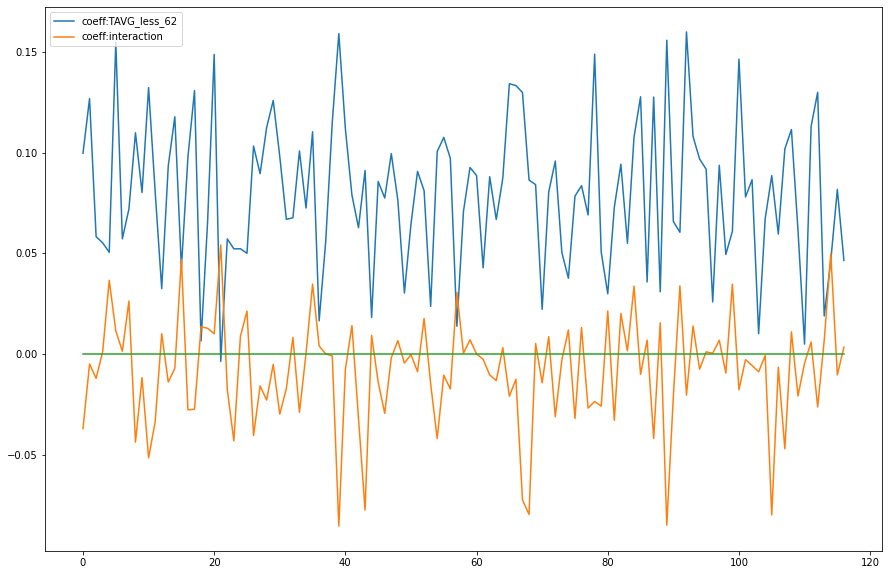

In [22]:
# x axis range
x = range(len(results))
plt.figure(figsize=(15,10))
# y2
plt.plot(x,results['TAVG_less_62'],label='coeff:TAVG_less_62')
# y2
plt.plot(x,results['interaction'],label='coeff:interaction')
# y=0 line 
plt.plot(x,[0] * len(results))
plt.legend(loc="upper left")

In [23]:
print(results[results.interaction > 0.01].count())
print(results[results.interaction < -0.01].count())

user_id         25
TAVG_less_62    25
interaction     25
intercept       25
dtype: int64
user_id         50
TAVG_less_62    50
interaction     50
intercept       50
dtype: int64


In [24]:
print(results['interaction'][results.interaction > 0.01].sum())
print(results['interaction'][results.interaction < -0.01].sum())
# the sum of negative interaction coefficients has a larger scale

0.5997255547988426
-1.5760446518924445


In [25]:
df_sac_18n19_daily_peak_w_temperature['const']=1
reg1 = sm.OLS(endog=df_sac_18n19_daily_peak_w_temperature['daily_total_cooling'], \
              exog=df_sac_18n19_daily_peak_w_temperature[['TAVG_less_62','interaction','const']], \
    missing='drop')
reg_result = reg1.fit(cov_type='HC1')
print(reg_result.summary())
#Peak Hours: 5pm to 8pm
#2019 consumption LOWERED by peak pricing, -10.375%

                             OLS Regression Results                            
Dep. Variable:     daily_total_cooling   R-squared:                       0.169
Model:                             OLS   Adj. R-squared:                  0.169
Method:                  Least Squares   F-statistic:                     3032.
Date:                 Wed, 14 Apr 2021   Prob (F-statistic):               0.00
Time:                         21:40:43   Log-Likelihood:                -35433.
No. Observations:                28431   AIC:                         7.087e+04
Df Residuals:                    28428   BIC:                         7.090e+04
Df Model:                            2                                         
Covariance Type:                   HC1                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
TAVG_less_62     0.0800      0.001    

In [26]:
df_sac_18n19_daily_peak.user_id.nunique()

117

# Peak Hours: 2019 consumption LOWERED by peak pricing, -10.375%
y variable: Total hours AC running for cooling
X variables: (T-62)